In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("50_Startups.csv")

In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [4]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [5]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]

In [6]:
dependent=dataset[[ 'Profit']]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [96]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse',max_features='auto',splitter='best')
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort=False,
                      random_state=None, splitter='best')

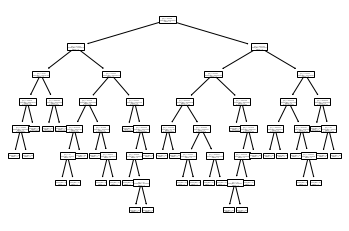

In [97]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [98]:
y_pre=regressor.predict(x_test)

In [99]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pre)
r_score

0.8931164786773635

In [100]:
import pickle
filename="Decision_regressor.sav"
pickle.dump(regressor,open(filename,'wb'))

In [101]:
load_model=pickle.load(open("Decision_regressor.sav",'rb'))
result=load_model.predict([[12342,56783,45677,0,1]])

In [102]:
result

array([69758.98])